# question 1 - purpose of gridsearch CV

Grid Search Cross-Validation (Grid Search CV) is a hyperparameter tuning technique used in machine learning to systematically search through a predefined set of hyperparameter combinations and determine the combination that yields the best performance for a given model.

**Purpose of Grid Search CV:**
The purpose of Grid Search CV is to automate the process of finding the optimal hyperparameters for a machine learning model. Hyperparameters are parameters that are not learned from the data but are set before training, such as learning rate, regularization strength, kernel type, etc. The right choice of hyperparameters can significantly impact a model's performance, and Grid Search CV helps identify the best hyperparameters to improve the model's accuracy and generalization.

**How Grid Search CV Works:**
Here's how Grid Search CV works:

1. **Define the Hyperparameter Space:**
   For each hyperparameter you want to tune, you define a set of possible values to try. This creates a grid of all possible combinations of hyperparameters.

2. **Cross-Validation:**
   The dataset is divided into multiple folds, and the model is trained and evaluated multiple times. For each combination of hyperparameters, the model is trained on some folds and validated on others. This helps in estimating the model's performance more reliably.

3. **Model Evaluation:**
   The performance of the model is assessed using a specified evaluation metric (e.g., accuracy, F1-score, etc.) on the validation folds of each cross-validation iteration.

4. **Grid Search:**
   Grid Search CV exhaustively tries all possible combinations of hyperparameters, training and evaluating the model for each combination. It keeps track of the performance metric for each combination.

5. **Best Hyperparameters:**
   After trying all combinations, Grid Search CV identifies the combination of hyperparameters that yielded the best performance according to the chosen evaluation metric.

6. **Final Model Training:**
   Once the best hyperparameters are determined, the final model is trained using these optimal hyperparameters on the entire training dataset.

**Benefits of Grid Search CV:**
- **Systematic Search:** Grid Search CV explores a wide range of hyperparameter combinations in a systematic and automated manner.
- **Avoids Manual Tuning:** It eliminates the need for manual trial and error to find optimal hyperparameters.
- **More Reliable Results:** Cross-validation provides more reliable estimates of model performance compared to evaluating on a single validation set.
- **Better Model Performance:** Identifying the best hyperparameters can lead to improved model accuracy and generalization to new data.

**Drawbacks of Grid Search CV:**
- **Computational Cost:** Grid Search CV can be computationally expensive, especially when there are multiple hyperparameters and a large dataset.
- **Large Search Space:** In a large search space, it might not be feasible to try every possible combination.
- **Inefficient for Continuous Spaces:** Grid Search is not ideal for hyperparameters with continuous value ranges; in such cases, techniques like Randomized Search may be more suitable.

Overall, Grid Search CV is a powerful technique for hyperparameter tuning that helps optimize model performance and streamline the model development process.

# question 2 - gridsearchCV and RandomizedsearchCV

Both Grid Search Cross-Validation (Grid Search CV) and Randomized Search Cross-Validation (Randomized Search CV) are hyperparameter tuning techniques used to find the best combination of hyperparameters for a machine learning model. However, they differ in how they explore the hyperparameter space and the situations in which they are most suitable.

**Grid Search Cross-Validation (Grid Search CV):**

- **Exploration Strategy:** Grid Search CV systematically explores all possible combinations of hyperparameters by creating a grid of all parameter values.
- **Search Space:** It searches over a predefined set of hyperparameter values for each parameter.
- **Exhaustive Search:** Grid Search CV evaluates the model for all possible combinations, which can be computationally expensive when there are many hyperparameters or a large number of values for each hyperparameter.
- **Suitable for:** Grid Search is suitable when you have a good understanding of the hyperparameter space and when the search space is relatively small. It's a more exhaustive approach and can be used when you want to ensure that you're exploring all possible hyperparameter combinations.

**Randomized Search Cross-Validation (Randomized Search CV):**

- **Exploration Strategy:** Randomized Search CV randomly samples hyperparameters from a distribution over the search space.
- **Search Space:** Instead of evaluating all possible combinations, it randomly selects a specific number of combinations to evaluate.
- **Efficiency:** Randomized Search is more efficient than Grid Search because it doesn't evaluate all possible combinations, making it suitable for larger search spaces or when the computational resources are limited.
- **Suitable for:** Randomized Search is suitable when the search space is large, when you want to quickly explore a variety of hyperparameters, or when you're uncertain about which hyperparameters are likely to be effective.

**Choosing Between Grid Search CV and Randomized Search CV:**

- If you have a small search space and computational resources are not a concern, Grid Search CV might be a good choice to ensure a thorough exploration of hyperparameters.
- If you have a large search space, limited computational resources, or want to quickly identify promising hyperparameters, Randomized Search CV is a more efficient approach.
- If you're unsure about the hyperparameter values that are likely to work best, Randomized Search CV provides a good balance between exploration and efficiency.

In summary, the choice between Grid Search CV and Randomized Search CV depends on the size of the hyperparameter search space, the available computational resources, and your level of certainty about the optimal hyperparameters.

# question 3 -  data leakage

**Data leakage** occurs when information from outside the training dataset is used to create a machine learning model, leading to overly optimistic performance evaluations and potentially resulting in poor generalization to new, unseen data. Data leakage is a critical problem because it can lead to models that appear to perform well during training and validation but fail to perform well on real-world data.

**Example of Data Leakage:**

Let's consider an example of credit card fraud detection. In this scenario, the goal is to build a model that accurately identifies fraudulent credit card transactions.

Suppose the dataset contains a feature called "Transaction Time" that indicates the time of each transaction. The feature is a continuous variable ranging from 0 to 24 hours. Now, imagine that the dataset was collected over a period of time, and the majority of fraudulent transactions tend to occur during certain hours, such as late at night.

Here's how data leakage might occur:

1. **Incorrect Feature Usage:**
   During feature engineering, if you inadvertently include the "Transaction Time" feature in your model, your model could learn that transactions occurring during specific hours are more likely to be fraudulent. This is not because of any true underlying pattern but because the fraud cases were overrepresented during those hours in the training dataset.

2. **Overfitting:**
   The model, due to the presence of the "Transaction Time" feature, starts to overfit the training data by capturing the specific hours when fraud occurred in the training dataset. It learns to rely on this artificial correlation to predict fraud.

3. **Evaluation:**
   When you evaluate your model using cross-validation or a holdout test set, the model appears to perform well because it has learned this spurious relationship between "Transaction Time" and fraud. The model's accuracy, precision, and recall metrics are all high.

4. **Deployment:**
   However, when you deploy the model to real-world scenarios, it fails to detect fraudulent transactions effectively. This is because the pattern it learned from the training data is not applicable to the new, unseen data. Transactions occur at different times, and the model's reliance on the "Transaction Time" feature doesn't hold true anymore.

In this example, using the "Transaction Time" feature led to data leakage. The model learned a relationship that doesn't exist in the real world, and this caused poor generalization. Data leakage can mislead you into believing your model is performing well when, in fact, it's simply memorizing artifacts from the training data.

To avoid data leakage, it's crucial to carefully examine and preprocess your data, ensure that the features you use are representative of real-world scenarios, and be cautious about introducing any information from the validation or test data into your model during training.

# question 4 -- prevention of data leakage

Preventing data leakage is essential to ensure that your machine learning model's performance is reliable and generalizes well to new, unseen data. Here are some strategies to prevent data leakage:

1. **Separate Data:**
   Keep your data clearly separated into training, validation, and test sets. Never use information from the validation or test sets during training.

2. **Feature Engineering:**
   Be cautious when creating or selecting features. Features that contain information about the target variable or use future information can lead to data leakage. Avoid using features that have a direct relationship with the target variable that would not be available in real-world scenarios.

3. **Time-Based Splitting:**
   If your data has a temporal aspect, split it in a way that mimics real-world scenarios. For example, use the earliest data for training, intermediate data for validation, and the latest data for testing.

4. **Pipeline Construction:**
   Use pipelines that encapsulate all preprocessing steps, including feature scaling, encoding, and imputation. Make sure these steps are applied consistently across training, validation, and test sets.

5. **Cross-Validation:**
   Implement cross-validation properly to avoid data leakage. Ensure that each fold in cross-validation is isolated and that preprocessing steps are performed separately for each fold.

6. **Use Only Training Data for Feature Selection:**
   If you're performing feature selection, use only the training data to make decisions about which features to include in your model. Do not use information from validation or test sets.

7. **Time-Series Considerations:**
   For time-series data, avoid using future information when creating features. Use only information available up to the time of prediction.

8. **Remove Irrelevant Information:**
   Remove features that could potentially introduce leakage or are not logically relevant to the problem you're solving.

9. **Documentation and Version Control:**
   Keep thorough documentation of your preprocessing steps, feature engineering, and data splitting. Use version control to track changes to your code and data to ensure reproducibility.

10. **Regularly Audit and Monitor:**
    Periodically review your modeling process for potential sources of data leakage, especially when making changes to your pipeline or features.

11. **External Information:**
    Be cautious when incorporating external data sources. Ensure that any additional data you use is also available at prediction time.

12. **Validation Set Performance:**
    Monitor your model's performance on the validation set and be wary of sudden improvements. If the performance seems too good to be true, it might indicate data leakage.

By following these strategies and maintaining a thorough understanding of your data, you can minimize the risk of data leakage and build more robust and reliable machine learning models.

# question 5 -- confusion matrix

A **confusion matrix** is a table that is used to evaluate the performance of a classification model by showing the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by the model for each class. It provides a detailed breakdown of the model's predictions and allows for a deeper understanding of its performance, especially in binary classification tasks.

Here's how a confusion matrix is structured:

```
               Actual Positive    Actual Negative
Predicted Positive      TP                FP
Predicted Negative      FN                TN
```

- **True Positive (TP):** The model correctly predicted the positive class (correctly classified as positive).
- **True Negative (TN):** The model correctly predicted the negative class (correctly classified as negative).
- **False Positive (FP):** The model incorrectly predicted the positive class (classified as positive but was actually negative).
- **False Negative (FN):** The model incorrectly predicted the negative class (classified as negative but was actually positive).

**Interpreting the Confusion Matrix:**

1. **Accuracy:** Overall accuracy of the model is calculated as \(\frac{TP + TN}{TP + TN + FP + FN}\). It measures how well the model performs across both classes.

2. **Precision (Positive Predictive Value):** Precision is calculated as \(\frac{TP}{TP + FP}\). It measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It's an indicator of the model's ability to avoid false positive errors.

3. **Recall (Sensitivity, True Positive Rate):** Recall is calculated as \(\frac{TP}{TP + FN}\). It measures the proportion of correctly predicted positive instances out of all actual positive instances. It's an indicator of the model's ability to correctly identify positive instances.

4. **Specificity (True Negative Rate):** Specificity is calculated as \(\frac{TN}{TN + FP}\). It measures the proportion of correctly predicted negative instances out of all actual negative instances.

5. **F1-Score:** F1-score is the harmonic mean of precision and recall: \(F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}\). It balances the trade-off between precision and recall, especially when one is more important than the other.

The confusion matrix helps you understand the strengths and weaknesses of your model's predictions. It's particularly useful when classes are imbalanced or when the cost of false positives and false negatives varies. By examining these metrics, you can make informed decisions about model improvements and adjustments to optimize its performance for the specific problem at hand.

# question 6 -- precision and recall

**Precision** and **recall** are two important metrics used to evaluate the performance of a classification model, particularly in scenarios where class imbalances or different costs associated with false positives and false negatives are present. These metrics are derived from the confusion matrix and provide insights into different aspects of the model's performance.

**Precision:**
Precision, also known as positive predictive value, measures the proportion of correctly predicted positive instances out of all instances that the model predicted as positive. In other words, it answers the question: "Of all instances the model predicted as positive, how many were actually positive?"

Mathematically, precision is calculated as:

\[ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} \]

Precision focuses on minimizing false positive errors. A high precision value indicates that when the model predicts a positive class, it's likely to be correct. However, it doesn't consider cases where the model fails to predict actual positive instances (false negatives).

**Recall:**
Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. In other words, it answers the question: "Of all actual positive instances, how many did the model correctly predict as positive?"

Mathematically, recall is calculated as:

\[ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} \]

Recall focuses on minimizing false negative errors. A high recall value indicates that the model is effective at identifying actual positive instances. However, it doesn't consider cases where the model incorrectly predicts positive instances that are actually negative (false positives).

**Trade-off Between Precision and Recall:**
There is often a trade-off between precision and recall. Improving one metric might lead to a decrease in the other. For example, if you set a high classification threshold to ensure high precision, the model will be more cautious in making positive predictions, which might cause it to miss some true positive cases and lead to a lower recall.

The F1-score is a metric that combines both precision and recall into a single value, providing a balance between the two. It's calculated as the harmonic mean of precision and recall:

\[ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \]

In summary, precision and recall are complementary metrics that provide insights into a model's performance with respect to false positive and false negative errors, respectively. The choice between them depends on the problem's specific requirements and the trade-offs you're willing to make between these two types of errors.

# question 7 - interpretation of confusion matrix

Interpreting a confusion matrix can provide valuable insights into the types of errors your classification model is making and help you understand its strengths and weaknesses. By analyzing the four components of the confusion matrix (True Positives, True Negatives, False Positives, and False Negatives), you can gain a clear picture of how well your model is performing and which types of errors it tends to make.

Let's break down the interpretation of a confusion matrix:

**True Positives (TP):**
These are instances where your model correctly predicted the positive class. It indicates instances that were actually positive and were correctly identified as such by your model. TP indicates the model's ability to correctly recognize positive instances.

**True Negatives (TN):**
These are instances where your model correctly predicted the negative class. It indicates instances that were actually negative and were correctly identified as such by your model. TN indicates the model's ability to correctly recognize negative instances.

**False Positives (FP):**
These are instances where your model incorrectly predicted the positive class when the actual class was negative. It indicates instances that were actually negative but were incorrectly identified as positive by your model. FP indicates the model's tendency to make Type I errors (false alarms).

**False Negatives (FN):**
These are instances where your model incorrectly predicted the negative class when the actual class was positive. It indicates instances that were actually positive but were incorrectly identified as negative by your model. FN indicates the model's tendency to make Type II errors (missed detections).

Interpreting these components provides insights into the following aspects:

1. **Model's Strengths:** By analyzing TP and TN, you can understand when your model performs well and correctly identifies positive and negative instances.

2. **Model's Weaknesses:** FP and FN show where the model tends to make mistakes. If your focus is on minimizing false positives, then a high number of FP may be a concern. If your goal is to minimize false negatives, then a high number of FN may be problematic.

3. **Trade-offs:** There is often a trade-off between precision and recall. Adjusting the classification threshold can influence the balance between these two metrics. Analyzing the confusion matrix can help you decide which trade-offs are acceptable for your problem.

4. **Class Imbalance:** If the classes are imbalanced, the confusion matrix can reveal whether your model is biased towards the majority class (leading to low recall for the minority class) or if it's sensitive to the minority class (leading to high false positives).

By understanding the types of errors your model is making, you can make informed decisions about model adjustments, feature engineering, and hyperparameter tuning to improve its overall performance and address its weaknesses.

# question 8 - common metrics

Several common metrics can be derived from a confusion matrix, each providing different insights into the performance of a classification model. Here are some key metrics and their calculations:

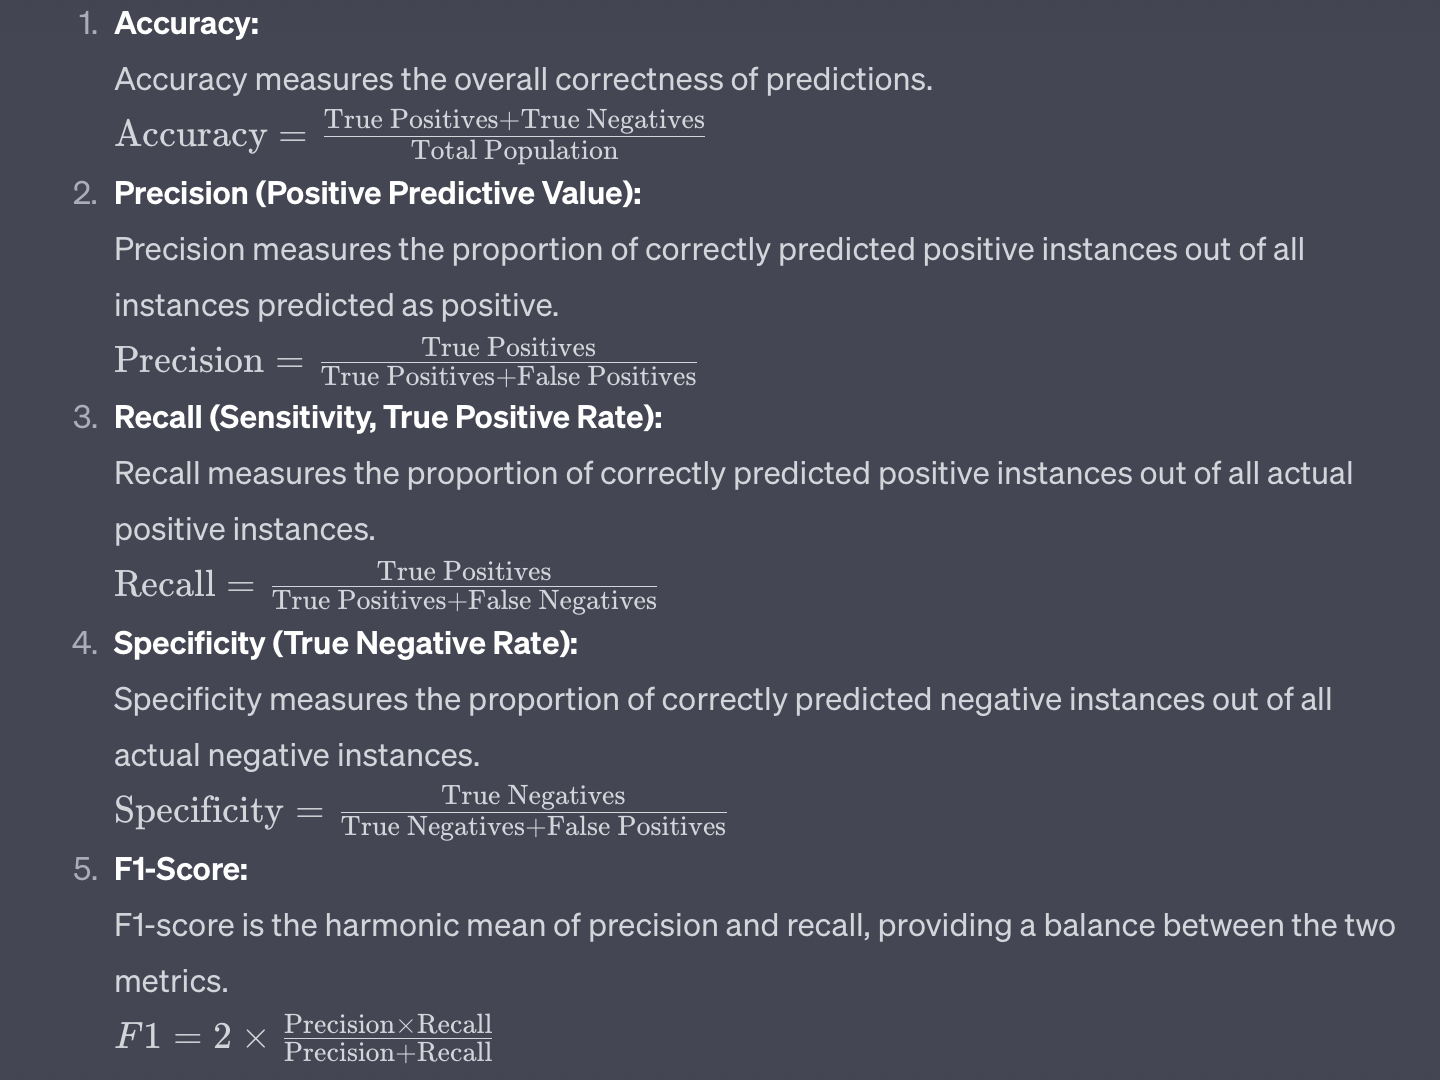

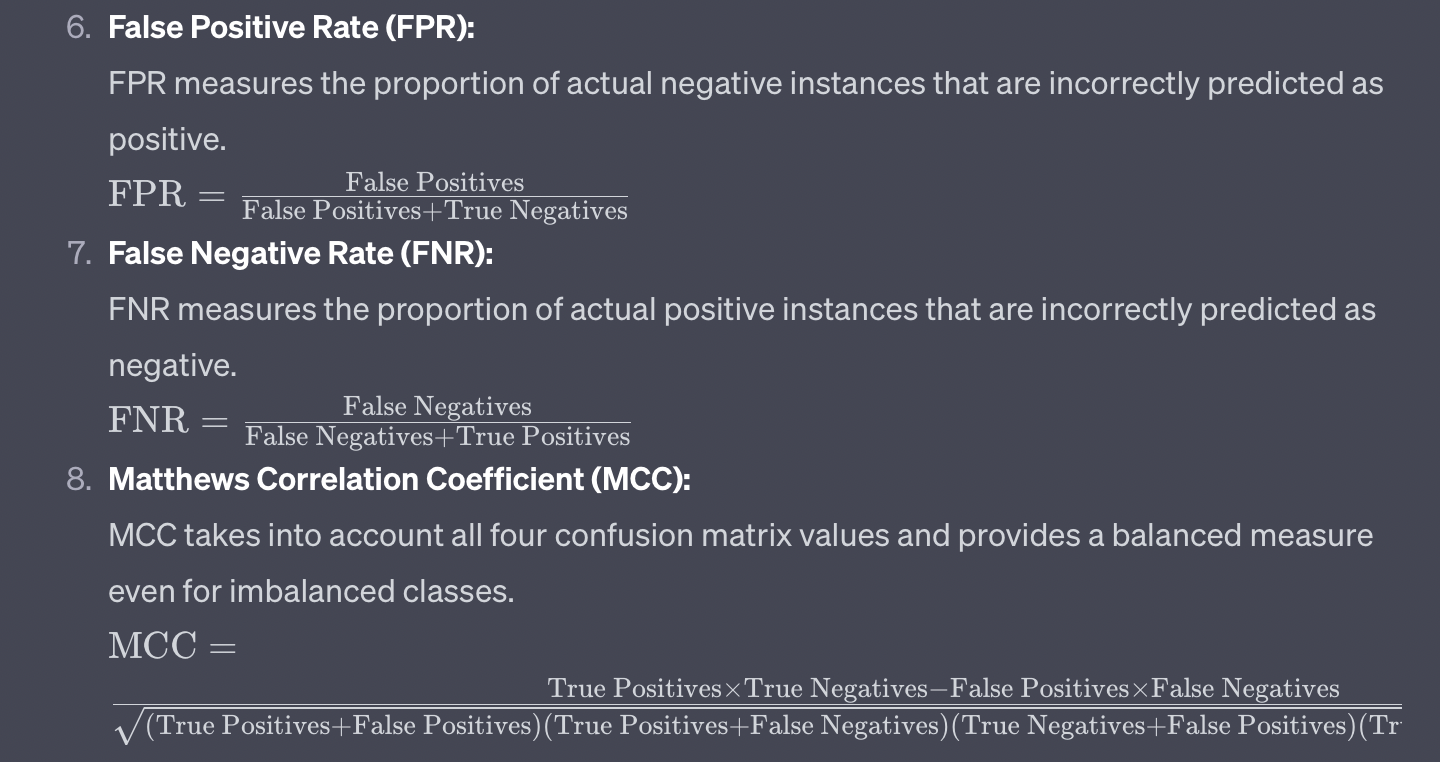

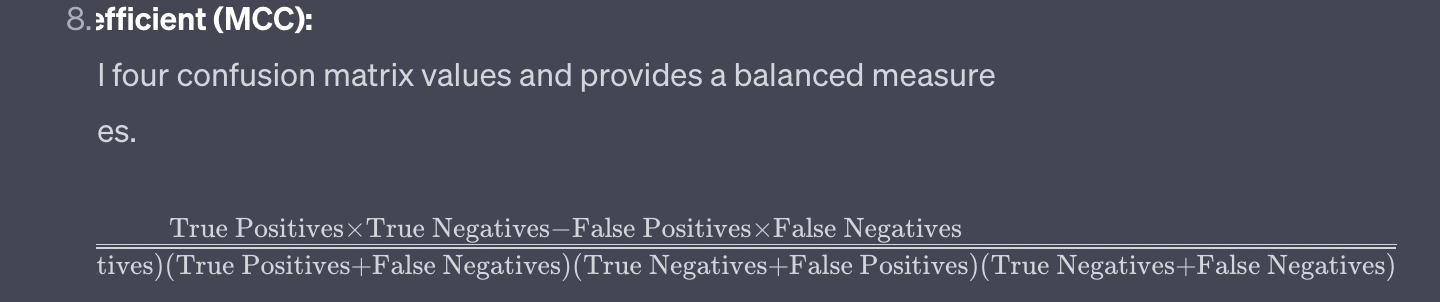
   
These metrics help you assess different aspects of your model's performance, such as its ability to make accurate predictions, its sensitivity to positive instances, its specificity for negative instances, and the trade-offs between false positives and false negatives. The choice of metric depends on your problem's requirements and the importance of various types of errors in your specific application.

# question 9 -- accuracy through confusion matrix

The **accuracy** of a model represents the proportion of correctly classified instances (both true positives and true negatives) out of the total number of instances in the dataset. While accuracy provides a general overview of a model's performance, it's important to consider the relationship between accuracy and the values in its confusion matrix to understand the sources of correct and incorrect predictions.

The relationship between accuracy and the values in the confusion matrix can be summarized as follows:

\[ \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{True Positives} + \text{True Negatives} + \text{False Positives} + \text{False Negatives}} \]

Here's how the values in the confusion matrix contribute to accuracy:

- **True Positives (TP):** These are correctly predicted positive instances. They contribute to both the numerator (correctly classified instances) and the denominator (total instances) of the accuracy formula.

- **True Negatives (TN):** These are correctly predicted negative instances. Like true positives, they contribute to both the numerator and the denominator of the accuracy formula.

- **False Positives (FP):** These are incorrectly predicted positive instances. They do not contribute to the numerator (correctly classified instances) but are part of the denominator (total instances).

- **False Negatives (FN):** These are incorrectly predicted negative instances. Similar to false positives, they do not contribute to the numerator (correctly classified instances) but are part of the denominator (total instances).

It's important to note that while accuracy provides a straightforward measure of overall performance, it may not be the best metric to rely on in scenarios with imbalanced classes or when the costs of false positives and false negatives are unequal. In such cases, other metrics like precision, recall, F1-score, and area under the ROC curve (AUC-ROC) may provide more informative insights into the model's performance.

Accuracy alone can be misleading, especially when classes are imbalanced. A high accuracy might mask the fact that the model is performing well on the majority class but poorly on the minority class. Therefore, a comprehensive understanding of the values in the confusion matrix and additional metrics are necessary to fully assess the strengths and weaknesses of a classification model.

# question 10 -- How can you use a confusion matrix to identify potential biases or limitations in your machine learning model?

A confusion matrix is a powerful tool for identifying potential biases or limitations in your machine learning model, especially in classification tasks. By analyzing the components of the confusion matrix (True Positives, True Negatives, False Positives, and False Negatives), you can gain insights into various aspects of bias, limitations, and potential areas for improvement in your model. Here's how you can use a confusion matrix to identify biases and limitations:

1. **Class Imbalance:**
   Look at the distribution of true positive, true negative, false positive, and false negative values. If there's a significant imbalance between classes, it can lead to biases. For example, if the majority class has a higher number of instances, the model might perform well on that class but poorly on the minority class.

2. **Disproportionate Errors:**
   Examine whether certain types of errors (false positives or false negatives) are more common than others. If one type of error occurs more frequently, it could indicate a bias towards one class or a limitation in the model's ability to predict certain instances.

3. **False Positive and False Negative Rates:**
   Analyze the false positive rate (FPR) and false negative rate (FNR) to understand how well your model balances between different types of errors. A high FPR might indicate a bias towards the positive class, while a high FNR might indicate a bias towards the negative class.

4. **Sensitivity and Specificity:**
   Sensitivity (recall) and specificity metrics provide insights into the model's performance for positive and negative instances. If sensitivity is high but specificity is low, the model might be overly sensitive to the positive class and prone to false positives.

5. **Trade-offs Between Metrics:**
   Consider the trade-offs between precision and recall. If one is high while the other is low, it indicates a bias towards minimizing one type of error at the expense of the other. Analyze which type of error is more problematic for your problem.

6. **Threshold Adjustment:**
   Experiment with adjusting the classification threshold and observe how it affects the confusion matrix and associated metrics. This can help you understand how your model's behavior changes under different decision boundaries.

7. **Domain Knowledge:**
   Compare the model's performance with your domain knowledge. If the model's predictions significantly deviate from what domain experts would expect, it might indicate limitations in the model's ability to capture relevant patterns.

8. **Data Collection Bias:**
   If your dataset is biased or not representative of the real-world distribution, it can lead to biased model predictions. Examine whether the confusion matrix reveals any patterns that could stem from biased data collection.

9. **Bias Mitigation Techniques:**
   If you identify biases or limitations, explore techniques like resampling, data augmentation, re-weighting, or fairness-aware models to mitigate those biases.

By thoroughly analyzing the confusion matrix and considering these factors, you can uncover biases, limitations, and areas for improvement in your machine learning model. This information is crucial for making informed decisions about model adjustments, feature engineering, and other strategies to enhance its performance and fairness.